Your Name: Kieran Fitzmaurice

The electric potential $V$ of a point charge $q$ as measured from distance $r$ away is given by
$$V=k\frac{q}{r}\,,$$
where $V$ has units of volts and $k=8.99\times10^{9}$ Nm$^2$C$^{-2}$ is the electrostatic constant.

Convince yourself that for a point charge $q$ at $(x_0, y_0)$, the electric potential at all other locations in the $xy$-plane is:
$$V(x,y)=k\frac{q}{\sqrt{(x-x_0)^2+(y-y_0)^2}}\,.$$ 

In cases where there is more than one point charge, the electric potential is given by the sum of the potentials from each point charge.

Write a function that outputs a 2-D array containing 100x100 values for the electric potential for $0<x<1$ m and $0<y<1$ m, given the locations and charges of two point charges.  

In [1]:
import numpy as np


class PointCharge:
    """
    This simple class holds the x-coordinate (in meters),
    the y-coordinate (in meters), and the charge (in Coulombs)
    of a point charge.
    """
    def __init__(self, x, y, q):
        self.x = x
        self.y = y
        self.q = q
        
def sum_potentials(x,y,p1,p2):
    k = 8.99e9 #electrostatic constant in N*m^2/C^2
    V = np.zeros((100,100))
    for p in p1,p2:
        V = V + k*(p.q/np.sqrt((x-p.x)**2 + (y-p.y)**2))
    return(V)
     
    
def potential(p1, p2):
    """
    Return a 100x100 grid of values for the electric
    potential, given two PointCharges as input.
    """
    x = np.linspace(0,1,100)
    y = np.linspace(0,1,100)
    xv,yv = np.meshgrid(x,y)
    potentials = sum_potentials(xv,yv,p1,p2)
    return(potentials)
    


In [2]:
#test your code
p1 = PointCharge(.505, .705, 2e-9)
p2 = PointCharge(.505, .305, -1e-9)
V = potential(p1, p2)
print(V[50,50]) #should be 44.98

44.9840544624


In [ ]:
#Use `imshow()` to plot your 2-D array using the `jet` colormap, with positive values capped at 100 V, and negative values capped at -100 V. Make sure the point (0,0) appears in the bottom left corner of the plot.

#Plot black contours on top of your plot, with enough contours shown to make the behavior of the electric potential clear.

#Label the axes of your plot.

#Your plot should look similar to this image:
#![example_plot.png](attachment:example_plot.png)

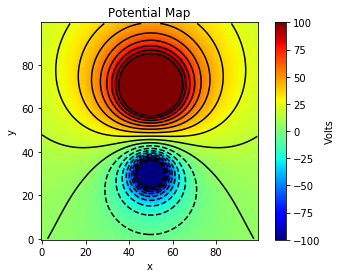

In [3]:
import matplotlib.pyplot as plt
plt.imshow(V,origin = "lower",vmin = -100, vmax = 100,cmap = "jet")
plt.title("Potential Map")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label = "Volts")
plt.contour(V,levels = np.linspace(-100,100,20),colors="black")
plt.show()
